# **STAT W5243: Applied Data Science - Project 1: Korean Drama Analysis**
### Team 12: Shayan Chowdhury (sc4040), Mengyan Li (ml4779), Zishun Shen (zs2695), Zhisheng Yang (zy2675)
### <font color='blue'>February 19, 2025</font>

# Introduction
Motivation (TODO: @Mengyan)

# Data
Data Acquisition
Dataset(s) description
- https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist
    - 2 datasets: kdramas + reviews (not merged)
- https://www.kaggle.com/datasets/noorrizki/top-korean-drama-list-1500
- https://www.kaggle.com/datasets/gianinamariapetrascu/top-100-k-drama-2023
- https://www.statista.com/statistics/831717/south-korea-film-industry-sales-revenue/

# Methodology

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Datasets 1-3: Korean Dramas from 2015-2023
Merging these 3 datasets, all containing varying information on Korean Dramas from 2015-2023, but mergable on the title (and year) columns.
- https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist
- https://www.kaggle.com/datasets/noorrizki/top-korean-drama-list-1500
- https://www.kaggle.com/datasets/gianinamariapetrascu/top-100-k-drama-2023

In [3]:
# Load dataset 1 (korean dramas from 2015-2023: https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist)
df_kdramas_1 = pd.read_csv("./data/raw/korean_drama.csv")

# Rename the drama_name column to title, will be useful later
df_kdramas_1 = df_kdramas_1.rename(columns={"drama_name": "title"})

df_kdramas_1

,kdrama_id,title,year,director,screenwriter,country,type,tot_eps,duration,start_dt,end_dt,aired_on,org_net,content_rt,synopsis,rank,pop
0,661d4193916c4e71a2c70473ab11e9e8,Sing My Crush,2023,['So Joon Moon'],NaN,South Korea,Drama,8,1500.0,"Aug 2, 2023","Aug 2, 2023",Wednesday,NaN,Not Yet Rated,Follow the story of acquaintances Ba Ram and H...,1484,2238
1,5ffcbeaa17114714af1959129984274c,D.P. Season 2,2023,NaN,['Kim Bo Tong'],South Korea,Drama,6,3000.0,"Jul 28, 2023","Jul 28, 2023",Friday,Netflix,15+ - Teens 15 or older,This unfolding story ensues when military dese...,164,1084
2,65075cb9c1a54be4a441cee6f16c9fdf,Shadow Detective Season 2,2023,['Han Dong Hwa'],"['Song Jung Woo', 'Hwang Seol Hun']",South Korea,Drama,8,3300.0,2023-07-05,2023-07-26,Wednesday,Disney+ Hulu,15+ - Teens 15 or older,Unfolds the ultimate counterattack of veteran ...,2443,6915
3,df0f0ac4b3ff4b15afa26f5a7a53a328,To Be Honest,2023,NaN,NaN,South Korea,Drama,3,600.0,2023-06-30,2023-07-14,Friday,NaN,Not Yet Rated,Don't you have those days where the whole univ...,49895,99999
4,04c1fe41948e464fb440001831d74d41,Celebrity,2023,['Kim Chul Gyu'],['Kim Yi Young'],South Korea,Drama,12,2700.0,"Jun 30, 2023","Jun 30, 2023",Friday,Netflix,18+ Restricted (violence & profanity),Fame. Money. Power. One young woman fights to ...,826,547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,e8c09f0f7d0d4b75a4642eb06d76d811,"Kill Me, Heal Me",2015,"['Kim Jin Man', 'Kim Dae Jin']",['Jin Soo Wan'],South Korea,Drama,20,3720.0,2015-01-07,2015-03-12,"Wednesday, Thursday",MBC,15+ - Teens 15 or older,A traumatic childhood experience leaves Cha Do...,232,29
1748,1e7f7f2fa45d4240b8bb585ca13040f0,Enchanting Neighbor,2015,['Park Kyung Ryul'],['Park Hye Ryun'],South Korea,Drama,120,2100.0,2015-01-05,2015-06-22,"Monday, Tuesday, Wednesday, Thursday, Friday",SBS,15+ - Teens 15 or older,"Gong Soo Rae only love her husband, Seo Bong G...",47882,10759
1749,142a09741fdd4daa878d6ae007201e43,Iron Lady Cha,2015,"['Jang Joon Ho', 'Oh Hyun Chang']",['Seol Kyung Eun'],South Korea,Drama,111,2400.0,2015-01-05,2015-06-12,"Monday, Tuesday, Wednesday, Thursday, Friday",MBC,15+ - Teens 15 or older,People born as a member of the baby boomer gen...,58155,14841
1750,9170c31a02014b56bb4cec2105086f00,The Family Is Coming,2015,['Joo Dong Min'],['Kim Shin Hye'],South Korea,Drama,20,3600.0,2015-01-03,2015-03-15,"Saturday, Sunday",SBS,15+ - Teens 15 or older,A grandma has abandoned her family 50 years ag...,7995,4289


In [4]:
# Load in dataset 2 (top 1500 kdramas: https://www.kaggle.com/datasets/noorrizki/top-korean-drama-list-1500)
df_kdramas_2 = pd.read_csv("./data/raw/kdrama_list.csv", index_col=0)

# Merge datasets 1 + 2
df_kdramas_12 = df_kdramas_2.merge(df_kdramas_1, left_on='Name', right_on='title', how='outer')

# Columns to merge ('new': 'original)
cols_to_merge = {
    'Sinopsis': 'synopsis',
    'Year': 'year',
    'Name': 'title',
    'Content Rating': 'content_rt',
    # 'Genre': 'genre',
    'Network': 'org_net'
}
# Fill missing values in the original columns with the new columns, and drop the new columns
for col, new_col in cols_to_merge.items():
    df_kdramas_12[new_col] = df_kdramas_12[new_col].fillna(df_kdramas_12[col])
    df_kdramas_12.drop(columns=[col], inplace=True)

# Fill missing values in the tot_eps column with the Episode column
# (separate from for loop above because it requires string parsing)
df_kdramas_12['tot_eps'] = df_kdramas_12['tot_eps'].fillna(df_kdramas_12['Episode'].str.split(' ').str[0].astype(float))
df_kdramas_12.drop(columns=['Episode'], inplace=True)

# If there are duplicate titles with the year, only keep the first row
df_kdramas_12 = df_kdramas_12.groupby(['title', 'year']).first().reset_index()

print('Dataset 1 length:', len(df_kdramas_1))
print('Dataset 2 length:', len(df_kdramas_2))
print('Merged dataset (1+2) length:', len(df_kdramas_12))
df_kdramas_12.isna().sum()

Dataset 1 length: 1752
Dataset 2 length: 1647
Merged dataset (1+2) length: 2302


title              0
year               0
Genre            659
Main Cast        659
Score            659
Tags             678
img url          659
kdrama_id        550
director        1266
screenwriter    1343
country          550
type             550
tot_eps            0
duration         574
start_dt         550
end_dt           550
aired_on         782
org_net          299
content_rt         0
synopsis         168
rank             550
pop              550
dtype: int64

In [5]:
# Load in dataset 3 (top 100 kdramas of 2023: https://www.kaggle.com/datasets/gianinamariapetrascu/top-100-k-drama-2023)
df_kdramas_3 = pd.read_csv("./data/raw/top100_kdrama.csv", index_col=0)
df_kdramas_3['year'] = 2023

# Find any common columns to merge on
common_cols = list(set(df_kdramas_3.columns) & set(df_kdramas_12.columns))

# Merge datasets 1 + 2 + 3
df_kdramas_123 = df_kdramas_3.merge(
    df_kdramas_12, 
    # left_on='Title', right_on='title', 
    left_on=common_cols + ['Title'], 
    right_on=common_cols + ['title'], 
    how='outer')

# Columns to merge ('new': 'original)
cols_to_merge = {
    'Synopsis': 'synopsis',
    'Title': 'title',
    'Episodes': 'tot_eps',
    'Start_date': 'start_dt',
    'End_date': 'end_dt',
    'Day_aired': 'aired_on',
    'Popularity': 'pop',
    'Duration': 'duration',
    'Rank': 'rank',
    'Main Role': 'Main Cast',
}
# Fill missing values in the original columns with the new columns, and drop the new columns
for col, new_col in cols_to_merge.items():
    df_kdramas_123[new_col] = df_kdramas_123[new_col].fillna(df_kdramas_123[col])
    df_kdramas_123.drop(columns=[col], inplace=True)

# Date formats seem to be very unstandardized (e.g, Aug  2, 2023,  2015-01-09)
# --> Reformat the start_dt and end_dt to standard YYYY-MM-DD format
for col in ['start_dt', 'end_dt']:
    df_kdramas_123[col] = pd.to_datetime(df_kdramas_123[col], format='mixed', errors='coerce')
    df_kdramas_123[col] = df_kdramas_123[col].dt.strftime('%Y-%m-%d')

# If there are duplicate titles with the year, only keep the first row
df_kdramas_123 = df_kdramas_123.groupby(['title', 'year']).first().reset_index()

print('Original merged dataset (Dataset 1 + 2) length:', len(df_kdramas_12))
print('New Dataset 3 length:', len(df_kdramas_3))
print('Merged dataset (1+2+3) length:', len(df_kdramas_123))
df_kdramas_123.isna().sum()

Original merged dataset (Dataset 1 + 2) length: 2302
New Dataset 3 length: 100
Merged dataset (1+2+3) length: 2402


title              0
year               0
Genre            659
Tags             678
Score            659
Watchers        2302
Main Cast        659
img url          759
kdrama_id        650
director        1366
screenwriter    1443
country          650
type             650
tot_eps            0
duration         574
start_dt         553
end_dt           565
aired_on         782
org_net          399
content_rt       100
synopsis         168
rank             550
pop              550
dtype: int64

In [6]:
# Rename variable for easier coding later on
df_kdramas = df_kdramas_123

# Save merged dataset
df_kdramas.to_csv('./data/processed/kdramas_merged.csv')

### Exploratory Data Analysis + Data Cleaning

In [7]:
# First of all, let's check for empty values in the dataset and see how we should handle them
df_kdramas.isna().sum()

title              0
year               0
Genre            659
Tags             678
Score            659
Watchers        2302
Main Cast        659
img url          759
kdrama_id        650
director        1366
screenwriter    1443
country          650
type             650
tot_eps            0
duration         574
start_dt         553
end_dt           565
aired_on         782
org_net          399
content_rt       100
synopsis         168
rank             550
pop              550
dtype: int64

### Exploratory Data Analysis

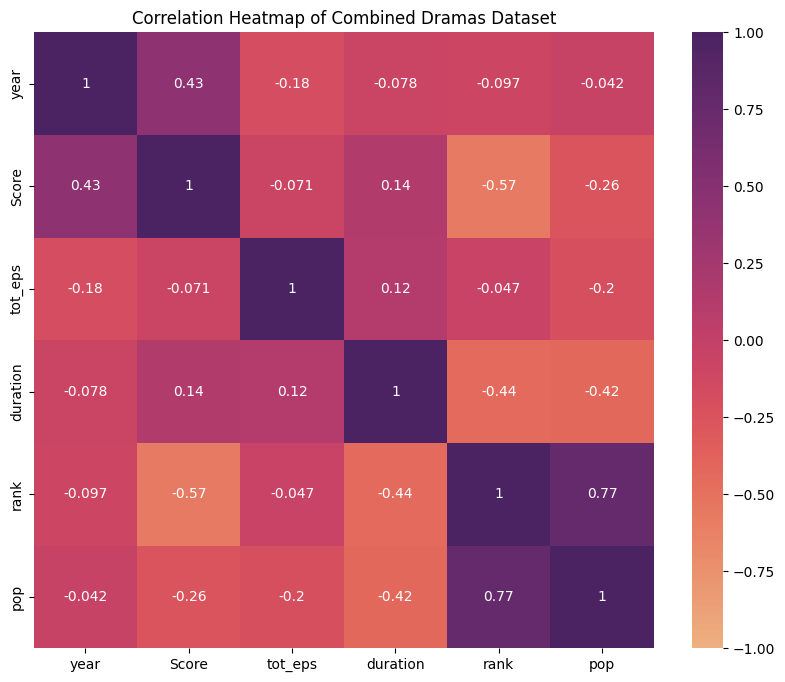

In [8]:
# Plot a heatmap of the correlation matrix of the dramas dataset between all numerical columns
import seaborn as sns

# Get numerical columns
numerical_cols = df_kdramas.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = df_kdramas[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Combined Dramas Dataset')
plt.show()

Notable findings from the correlation matrix/heatmap above: 

- The strongest positive correlation (0.77) exists between `rank` and `pop` (popularity), suggesting that as a drama's popularity increases, its rank number also increases
- `year` and `score` show a moderate positive correlation (0.43), suggesting newer dramas tend to have slightly higher scores. However, this does not extend to `rank` and `pop` suggesting they may be more influenced by other factors
- `score` and `rank` have a notable negative correlation (-0.57), indicating that higher-scored dramas tend to have lower rank numbers (better rankings). `score` and `pop` also show a slight negative correlation (-0.26)
- `duration` shows moderate negative correlations with both `rank` (-0.44) and `pop` (-0.42), indicating that longer dramas tend to have lower rank numbers and lower popularity scores—and thereby, that viewers may prefer shorter dramas
- `tot_eps` (Total Episodes) has generally weak correlations with most variables, with the strongest being -0.2 with `pop`, which suggests that number of episodes does not strongly influence popularity and in some cases, even negatively correlates with it

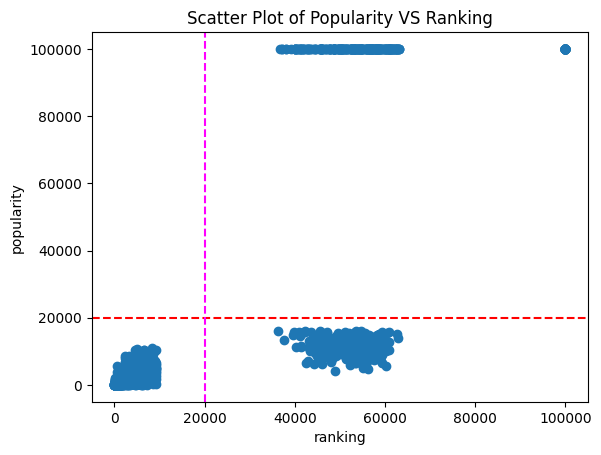

In [9]:
# Plot scatter plot of ranking vs popularity
plt.scatter(df_kdramas['rank'], df_kdramas['pop'])
plt.title('Scatter Plot of Popularity VS Ranking')
plt.xlabel('ranking')
plt.ylabel('popularity')

# Make a horizontal line at y = 200000
plt.axhline(y=20000, color='red', linestyle='--')

# Make a vertical line at x = 20000
plt.axvline(x=20000, color='magenta', linestyle='--')

plt.show()

Number of dramas before removing outliers: 2402
Number of dramas after removing outliers: 1264


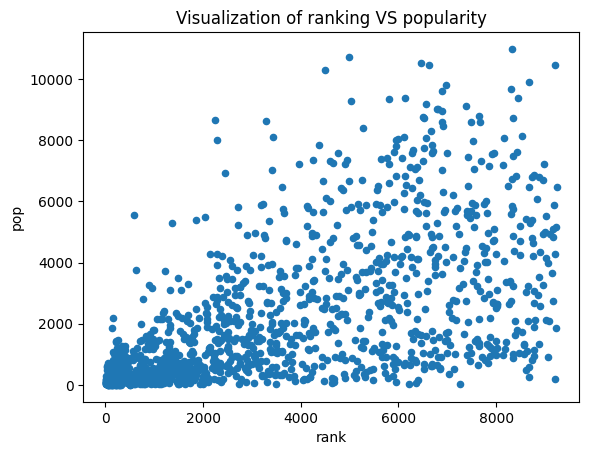

In [10]:
# Seems like there are some large outliers in the data

# Remove outliers via threshold determined by the scatter plot 
# (everything above the red line and to the right of the magenta line)

print('Number of dramas before removing outliers:', len(df_kdramas))
df_kdramas_cleaned = df_kdramas[
    (df_kdramas['pop'] < 200000) &
    (df_kdramas['rank'] < 20000)
]
print('Number of dramas after removing outliers:', len(df_kdramas_cleaned))

# Plot histogram of popularity
df_kdramas_cleaned.plot(kind='scatter', x='rank', y='pop', title='Visualization of ranking VS popularity')
plt.show()

### Data Repopulation

In [11]:
# # Repopulate the dataset with missing info from mydramalist.com (VERY SLOW BUT FOR DEMO PURPOSES)
# from scripts.scrape_mydramalist import scrape_drama_info

# import random
# import time
# from tqdm.auto import tqdm
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC

# # Set up Chrome options
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--headless')
# chrome_options.add_argument('--no-sandbox')

# # # Add a random user agent
# UAS = ["Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
#         "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"]
# chrome_options.add_argument(f'user-agent={random.choice(UAS)}')

# # Initialize the driver
# driver = webdriver.Chrome(options=chrome_options)

# # Get rows where at least one of director, screenwriter, or synopsis is missing
# missing_info_mask = df_kdramas_cleaned[['director', 'screenwriter', 'synopsis']].isna().any(axis=1)
# rows_with_missing = df_kdramas_cleaned[missing_info_mask][3:]

# # Loop through only those rows with missing values
# for idx, row in tqdm(rows_with_missing.iterrows(), total=len(rows_with_missing), desc="Scraping drama info"):
#     print(f"Scraping info for {row['drama_name']}...")
#     director, screenwriter, synopsis = scrape_drama_info(row['drama_name'])
    
#     # Update only if values are missing and we got new values
#     if pd.isna(row['director']) and director:
#         df_kdramas_cleaned.at[idx, 'director'] = [director]
#     if pd.isna(row['screenwriter']) and screenwriter:
#         df_kdramas_cleaned.at[idx, 'screenwriter'] = [screenwriter]
#     if pd.isna(row['synopsis']) and synopsis:
#         df_kdramas_cleaned.at[idx, 'synopsis'] = synopsis
        
#     # Add a small delay to avoid overwhelming the server
#     time.sleep(random.uniform(1, 3))

## Dataset 4: Movie Industry Sales Revenue in South Korea 2014-2023
- https://www.statista.com/statistics/831717/south-korea-film-industry-sales-revenue/

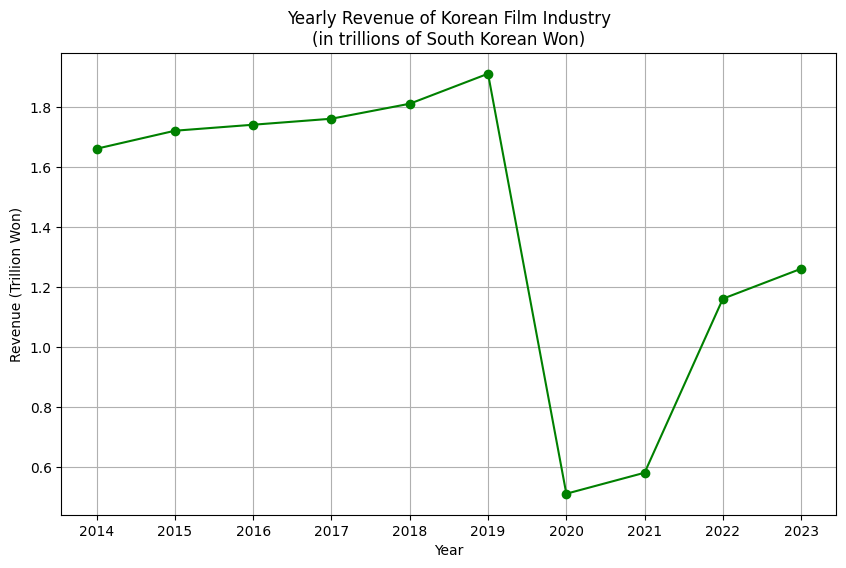

In [12]:
df_revenue = pd.read_excel("./data/raw/statistic_id831717_movie-industry-sales-revenue-in-south-korea-2014-2023.xlsx", sheet_name="Data")
df_revenue.drop(columns=['Unnamed: 0'], inplace=True)
df_revenue.rename(columns={
    'Unnamed: 1': 'year',
    'Unnamed: 2': 'revenue_trillion_won'
}, inplace=True)
df_revenue.drop(index=[0,1,2,3], inplace=True)
df_revenue['year'] = df_revenue['year'].astype(int)

plt.figure(figsize=(10, 6))
plt.plot(df_revenue['year'], df_revenue['revenue_trillion_won'], marker='o', linestyle='-', color='g')
plt.title('Yearly Revenue of Korean Film Industry\n(in trillions of South Korean Won)')
plt.xlabel('Year')
plt.ylabel('Revenue (Trillion Won)')
plt.xticks(df_revenue['year'])
plt.grid(True)
plt.show()

In [13]:
df_kdramas_numeric_cols = df_kdramas.select_dtypes(include=[np.number]).columns
df_kdramas_by_year = df_kdramas[df_kdramas_numeric_cols].groupby('year').mean().reset_index()

df_kdramas_revenue = df_kdramas_by_year.merge(df_revenue, on='year', how='outer')
df_kdramas_revenue = df_kdramas_revenue.dropna()
df_kdramas_revenue

,year,Score,tot_eps,duration,rank,pop,revenue_trillion_won
17,2015.0,7.503960,29.801370,2596.714286,19885.902778,11735.895833,1.72
18,2016.0,7.703810,25.849711,2249.820359,24703.953488,21716.005814,1.74
19,2017.0,7.806349,22.480198,1907.755102,24258.094059,25174.618812,1.76
20,2018.0,7.770139,20.599057,1945.188679,21541.245283,24818.617925,1.81
21,2019.0,7.864706,18.847390,1823.606557,22361.914286,24345.816327,1.91
22,2020.0,7.841379,15.940367,1979.439252,22562.599078,23274.225806,0.51
23,2021.0,7.857718,13.879377,2153.647059,25918.883268,26427.396887,0.58
24,2022.0,7.921290,13.408072,2441.727273,19910.950673,20625.771300,1.16
25,2023.0,8.623387,15.232044,1338.966667,5225.766667,3704.305556,1.26


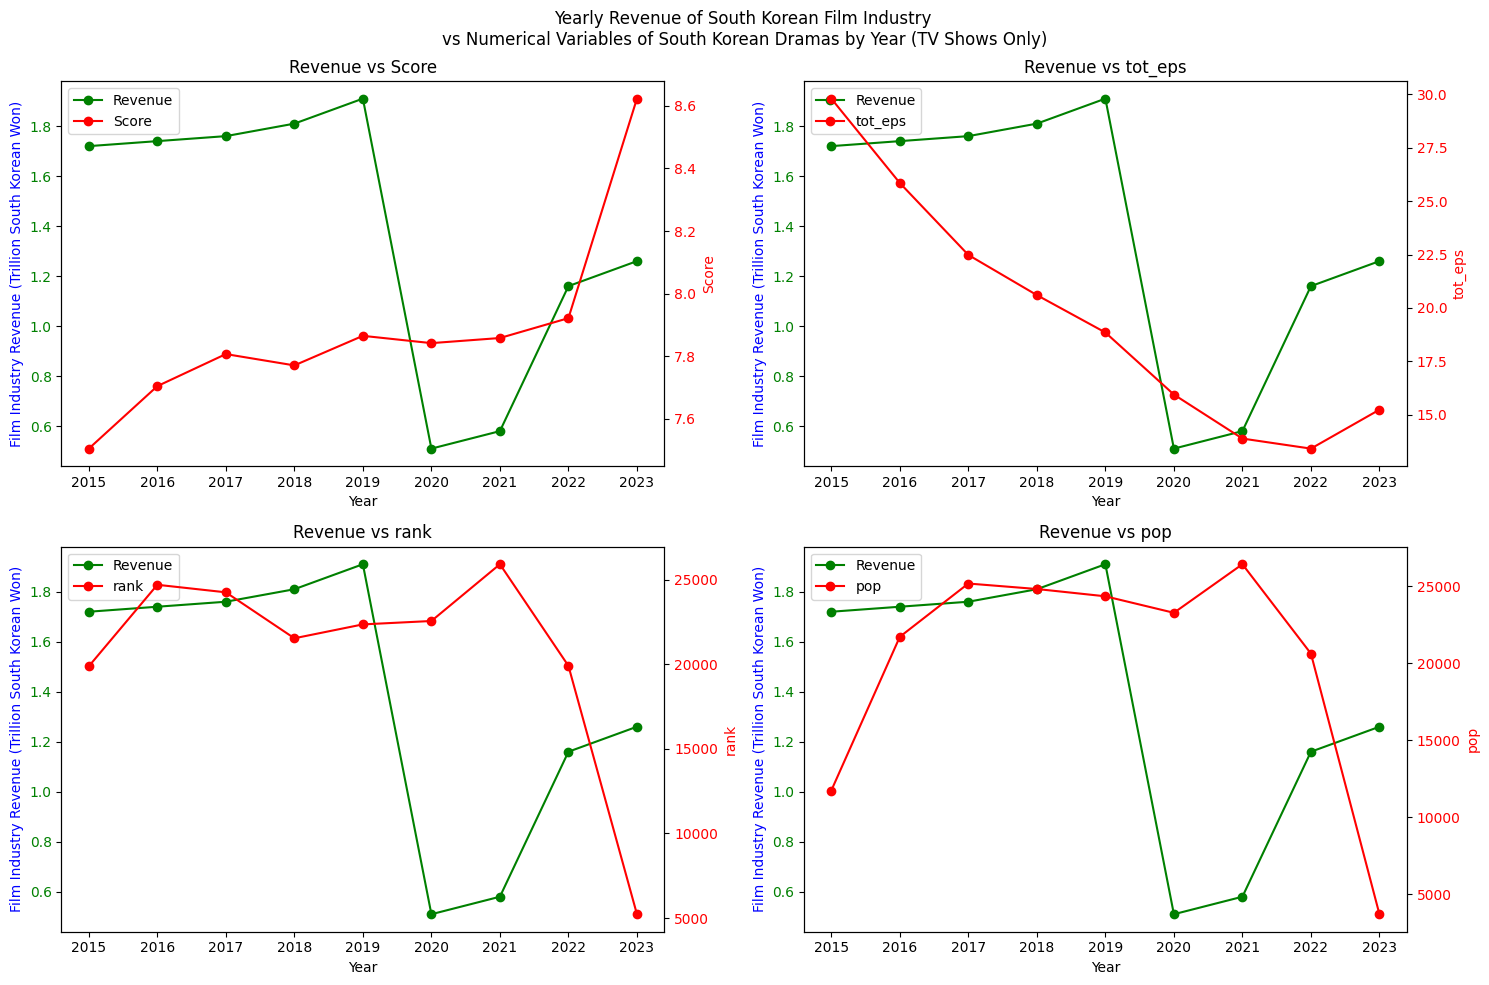

In [14]:
# Plot line plots of revenue (one line on first y axis) and every other numerical variable (second line on second y axis) with x axis as year
# Create subplots for each numerical variable compared with revenue
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# Get numerical columns excluding year and revenue
num_cols = [col for col in df_kdramas_revenue.select_dtypes(include=[np.number]).columns 
           if col not in ['year', 'revenue_trillion_won', 'duration']]

# Plot each numerical variable against revenue
for i, col in enumerate(num_cols):
    ax1 = axes[i]
    ax2 = ax1.twinx()
    
    # Plot revenue on first y-axis
    ax1.plot(df_kdramas_revenue['year'], df_kdramas_revenue['revenue_trillion_won'], 
             color='g', label='Revenue', marker='o', linestyle='-')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Film Industry Revenue (Trillion South Korean Won)', color='blue')
    ax1.tick_params(axis='y', labelcolor='g')
    
    # Plot other variable on second y-axis
    ax2.plot(df_kdramas_revenue['year'], df_kdramas_revenue[col], 
             color='red', label=col, marker='o', linestyle='-')
    ax2.set_ylabel(col, color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Set title
    ax1.set_title(f'Revenue vs {col}')
    
    # Add legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.suptitle('Yearly Revenue of South Korean Film Industry \nvs Numerical Variables of South Korean Dramas by Year (TV Shows Only)')
plt.tight_layout()
plt.show()

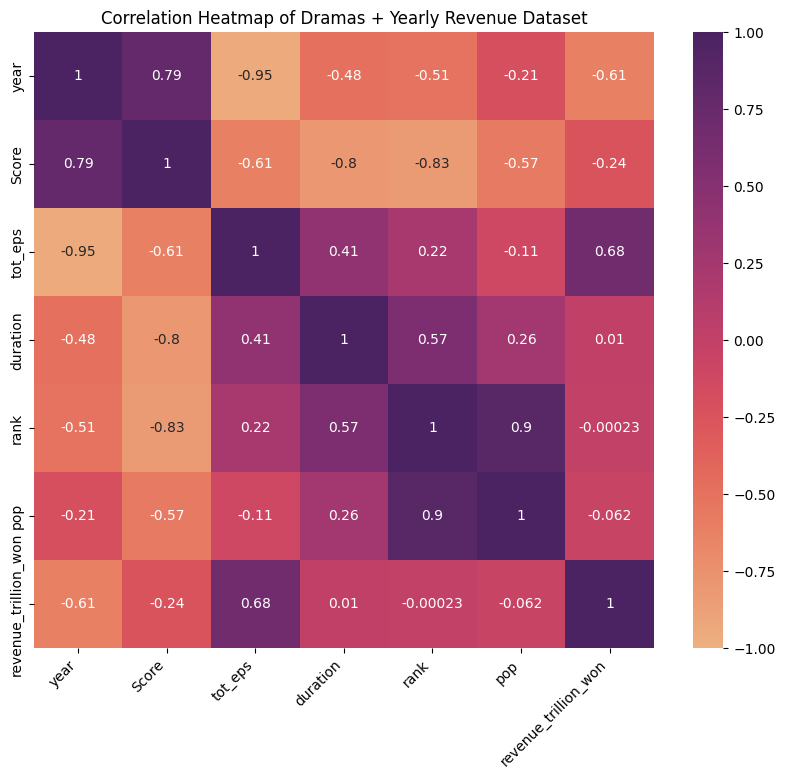

In [15]:
# Plot a heatmap of the correlation matrix of the merged dramas + revenue dataset
import seaborn as sns

# Get numerical columns
numerical_cols = df_kdramas_revenue.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = df_kdramas_revenue[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='flare', vmin=-1, vmax=1)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap of Dramas + Yearly Revenue Dataset')
plt.show()

**Notable findings from the line plots AND correlation matrix above:**
- Note that the `revenue` variable is for the entire South Korean film industry, not just dramas. However, Korean dramas do indeed contribute a significant portion of South Korea's economic output, including revenue from exports and employment. This analysis is still useful to see how the drama industry is doing relative to the rest of the film industry.
- Pre-Pandemic Trends (2015-2019)
    - `revenue` of the South Korean Film Industry showed steady growth from 2015 to 2019, while scores gradually improved
    - `tot_eps` (total episodes) was decreasing steadily, suggesting a trend toward shorter series formats while maintaining higher revenue
    - `pop` (popularity) and `rank` maintained relatively stable patterns, indicating consistent audience engagement
- Pandemic Impact (2020)
    - `revenue` dropped sharply in 2020, falling to about 0.5 trillion won from 1.9 trillion won in 2019
    - Surprisingly, `score` remained stable during this period, suggesting that while the industry's financial performance suffered, content quality was maintained. Or that during the pandemic, shows that were filmed prior were being released. Or that the audience was more forgiving during the pandemic.
    - `tot_eps` continued its downward trend, possibly accelerated by production challenges during the pandemic
- Post-Pandemic Recovery (2021-2023)
    - `revenue` shows a gradual recovery pattern but hasn't returned to pre-pandemic levels
    - `score` reached its highest point (8.6) in 2023, showing significant improvement
    - `pop` and `rank` show volatile patterns during the recovery period

**Other Notable Findings:**
- The strong negative correlation between `year` and `tot_eps` (total number of episodes) (-0.95) suggests a clear industry shift toward shorter formats—whether due to the pandemic or other factors
- The positive correlation between `tot_eps` and `revenue` (0.68) implies that longer series historically generated more revenue, though this trend might be changing
- The relatively weak correlation between `revenue` and `popularity/rank` (-0.062/-0.00023) suggests that commercial success isn't necessarily tied to traditional popularity metrics

In [16]:
df_kdramas_revenue.to_csv('./data/processed/kdramas_revenue_by_year.csv')

## Dataset 5: Korean Dramas Reviews Dataset
- https://www.kaggle.com/datasets/chanoncharuchinda/korean-drama-2015-23-actor-and-reviewmydramalist

In [17]:
# Load in reviews dataset
df_reviews = pd.read_csv("./data/raw/reviews.csv")

# Remove rows with missing values on columns of interest
df_reviews = df_reviews.dropna(subset=['title', 'overall_score', 'review_text', 'ep_watched', 'n_helpful'])
print(f"Initial number of reviews: {len(df_reviews)}")

# Only keep reviews for dramas in our dataset
df_reviews = df_reviews[df_reviews['title'].isin(df_kdramas['title'])]
print(f"Number of reviews after filtering with dramas in dataset 1: {len(df_reviews)}")
df_reviews

Initial number of reviews: 10619
Number of reviews after filtering with dramas in dataset 1: 10619


,user_id,title,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,review_text,ep_watched,n_helpful
0,c8ffdab3f2a338eeb54b265598dbbb55,Sing My Crush,9.0,9.0,10.0,9.0,9.0,the Best Song from my Crush This will now ran...,8 of 8 episodes seen,23
1,c8ffdab3f2a338eeb54b265598dbbb55,Happy Merry Ending,5.0,7.0,9.0,4.0,6.5,I'm Happy and Merry That it Ended Quickly The ...,8 of 8 episodes seen,31
2,c8ffdab3f2a338eeb54b265598dbbb55,Duty After School: Part 2,4.0,9.0,3.0,1.0,4.0,This PART 2 Should Never Have Happened If you...,4 of 4 episodes seen,121
3,c8ffdab3f2a338eeb54b265598dbbb55,Our Dating Sim,9.0,9.5,9.0,9.0,9.0,I want to play this dating sim! I want to pla...,8 of 8 episodes seen,79
4,c8ffdab3f2a338eeb54b265598dbbb55,The Director Who Buys Me Dinner,7.5,8.5,7.0,6.0,7.0,"Half-Cooked, Dont Eat A hard pass, unless som...",10 of 10 episodes seen,66
...,...,...,...,...,...,...,...,...,...,...
10620,33bb7ae6e00a345c927f1b8e39594908,Heart to Heart,8.0,9.0,7.0,9.0,9.0,it was a really good drama. highly recommended...,16 of 16 episodes seen,3
10621,e5d4bbe315b03eb4878aa84d2f4fcff0,"Kill Me, Heal Me",8.5,10.0,10.0,10.0,9.5,The only flaws I found in this drama were the ...,20 of 20 episodes seen,40
10622,43aaace8631f36eda17a1880c7329a82,"Kill Me, Heal Me",5.5,7.5,7.5,5.5,5.5,If you're looking for a well written drama abo...,20 of 20 episodes seen,29
10623,172b38a4599f3a649fe192fb967ce084,"Kill Me, Heal Me",9.0,10.0,10.0,8.0,9.5,"I started watching this drama, because of the ...",20 of 20 episodes seen,23


### Exploratory Data Analysis

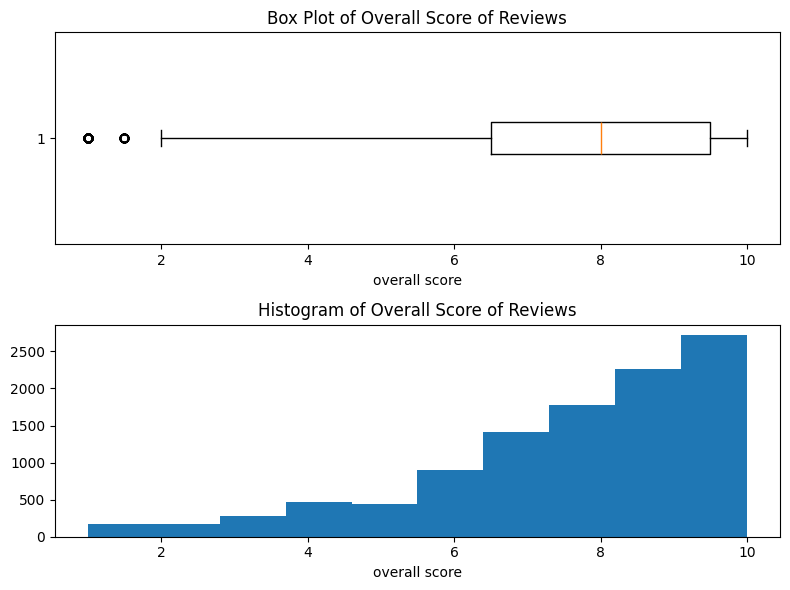

In [18]:
# Plot a box plot (horizontal) and histogram of the overall score of the reviews
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
axs[0].boxplot(df_reviews['overall_score'], vert=False)
axs[0].set_title('Box Plot of Overall Score of Reviews')
axs[0].set_xlabel('overall score')
axs[1].hist(df_reviews['overall_score'])
axs[1].set_title('Histogram of Overall Score of Reviews')
axs[1].set_xlabel('overall score')
plt.tight_layout()
plt.show()

## Merging Korean Dramas Dataset with Reviews Dataset

In [19]:
# Merge the two datasets on the title column
df_kdramas_reviews = pd.merge(df_kdramas, df_reviews, on='title', how='outer')

# Drop rows where numeric_cols are nan
numeric_cols = df_kdramas_reviews.select_dtypes(include=[np.number]).columns
df_kdramas_reviews = df_kdramas_reviews.dropna(subset=numeric_cols)

# Display the merged dataset
df_kdramas_reviews

,title,year,Genre,Tags,Score,Watchers,Main Cast,img url,kdrama_id,director,...,pop,user_id,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,review_text,ep_watched,n_helpful
1,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,b13c5efdc2523a37b4dd238a802ebe8a,7.0,8.0,8.0,5.0,7.0,"As a valid fan of the actor Kyungsoo, I had to...",16 of 16 episodes seen,14.0
2,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,57f010032ba136f99d4f95befef7d00d,8.0,10.0,8.0,8.0,8.0,Talk about chemistry! D.O. and Nam Ji Hyun b...,16 of 16 episodes seen,7.0
3,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,637b678978cb3be09efeaf5f38daf016,8.0,9.5,8.0,7.5,8.5,I didn't expect to like this drama as much as ...,16 of 16 episodes seen,16.0
4,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,c543f89ef3303316869292d39971630c,6.0,7.0,7.0,5.5,6.5,"Yet another Joseon drama, that adds nothing. ....",16 of 16 episodes seen,6.0
5,100 Days My Prince,2018.0,"Historical, Comedy, Romance, Drama","Amnesia,, Hidden Identity,, Marriage Of Conven...",8.3,None,"Doh Kyung Soo, Nam Ji Hyun, Kim Seon Ho, Han S...",https://i.mydramalist.com/p0yXrc.jpg?v=1,53c858d11a284859a1f50699b5aa6f51,"['Lee Jong Jae', 'Nam Sung Woo']",...,140.0,ce3e111ad52b3a59a56bbecf4b5a18d3,5.5,8.0,8.0,5.0,7.0,I started this drama only for the sake of D.O....,16 of 16 episodes seen,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11771,Zombie Detective,2020.0,"Thriller, Mystery, Comedy, Fantasy","Investigation,, Nice Male Lead,, Strong Female...",8.2,None,"Choi Jin Hyuk, Park Ju Hyun, Tae Hang Ho, Lee ...",https://i.mydramalist.com/wz4R1_4c.jpg?v=1,31f0ed457f9e4989966116dc6ba7a0d0,['Shim Jae Hyun'],...,597.0,5d09e126700738f9aed098b6eab126cc,1.0,7.0,7.0,1.0,4.5,Stupid AF This is a show that relies only on ...,24 of 24 episodes seen,9.0
11772,Zombie Detective,2020.0,"Thriller, Mystery, Comedy, Fantasy","Investigation,, Nice Male Lead,, Strong Female...",8.2,None,"Choi Jin Hyuk, Park Ju Hyun, Tae Hang Ho, Lee ...",https://i.mydramalist.com/wz4R1_4c.jpg?v=1,31f0ed457f9e4989966116dc6ba7a0d0,['Shim Jae Hyun'],...,597.0,3d35a63bf011332f9b76e9e3bd01ffb6,9.0,9.0,10.0,8.0,9.0,Surprisingly Wholesome This is the first revi...,24 of 24 episodes seen,43.0
11773,Zombie Detective,2020.0,"Thriller, Mystery, Comedy, Fantasy","Investigation,, Nice Male Lead,, Strong Female...",8.2,None,"Choi Jin Hyuk, Park Ju Hyun, Tae Hang Ho, Lee ...",https://i.mydramalist.com/wz4R1_4c.jpg?v=1,31f0ed457f9e4989966116dc6ba7a0d0,['Shim Jae Hyun'],...,597.0,e1d35959b95c31c59fa372114c15837b,8.0,8.0,5.5,7.5,7.5,"Pure, Crazy Fun Despite how some of the still...",24 of 24 episodes seen,19.0
11774,Zombie Detective,2020.0,"Thriller, Mystery, Comedy, Fantasy","Investigation,, Nice Male Lead,, Strong Female...",8.2,None,"Choi Jin Hyuk, Park Ju Hyun, Tae Hang Ho, Lee ...",https://i.mydramalist.com/wz4R1_4c.jpg?v=1,31f0ed457f9e4989966116dc6ba7a0d0,['Shim Jae Hyun'],...,597.0,72816641021237e9af64a6917daa24d8,8.0,8.0,9.0

In [20]:
print(df_kdramas_reviews.drop(columns=['Score']).describe().to_markdown())

|       |       year |   tot_eps |   duration |     rank |      pop |   story_score |   acting_cast_score |   music_score |   rewatch_value_score |   overall_score |   n_helpful |
|:------|-----------:|----------:|-----------:|---------:|---------:|--------------:|--------------------:|--------------:|----------------------:|----------------:|------------:|
| count | 9823       | 9823      |    9823    |  9823    |  9823    |    9823       |          9823       |    9823       |            9823       |      9823       |   9823      |
| mean  | 2019.11    |   18.7209 |    3020.11 |  3196.22 |  1401.66 |       7.56179 |             8.50097 |       7.67276 |               6.24    |         7.70294 |     16.2043 |
| std   |    2.29225 |   17.0432 |    1333.96 |  2816.44 |  1547.09 |       2.18148 |             1.6858  |       2.12697 |               3.06633 |         2.05787 |     32.6251 |
| min   | 2015       |    1      |      52    |     8    |     1    |       1       |             1 

## Feature Engineering

In [ ]:
# Do sentiment analysis on the review text using a pre-trained DistilBERT model
from tqdm.auto import tqdm
from scripts.classify_sentiment import classify_sentiment_batch

# Classify the sentiment of each review in batches of 100 (parallel processing)
batch_size = 100
batches = [df_kdramas_reviews['review_text'][i:i+batch_size] for i in range(0, len(df_kdramas_reviews), batch_size)]
for batch in tqdm(batches, desc="Processing batches"):
    sentiments, confidences = classify_sentiment_batch(batch.to_list())
    df_kdramas_reviews.loc[batch.index, 'sentiment'] = sentiments
    df_kdramas_reviews.loc[batch.index, 'sentiment_confidence'] = confidences

df_kdramas_reviews['sentiment'].value_counts()

In [24]:
# df_kdramas_reviews.to_csv('./data/processed/kdramas_reviews_merged_sentiment.csv')
df_kdramas_reviews = pd.read_csv('./data/processed/kdramas_reviews_merged_sentiment.csv', index_col=0)

## Exploratory Data Analysis

In [25]:
print("Summary statistics for numerical columns:")
df_kdramas_reviews.describe()

Summary statistics for numerical columns:


,year,Score,tot_eps,duration,rank,pop,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,n_helpful,sentiment_confidence
count,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000
mean,2019.111168,7.933126,18.720859,3020.105467,3196.221317,1401.660491,7.561794,8.500967,7.672758,6.239998,7.702942,16.204316,0.627248
std,2.292245,0.516705,17.043157,1333.961938,2816.443608,1547.087615,2.181480,1.685797,2.126972,3.066335,2.057875,32.625094,0.145947
min,2015.000000,6.500000,1.000000,52.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.337408
25%,2017.000000,7.600000,12.000000,1980.000000,985.000000,331.000000,6.500000,8.000000,6.500000,4.000000,6.500000,2.000000,0.504759
50%,2019.000000,7.900000,16.000000,3600.000000,2506.000000,875.000000,8.000000,9.000000,8.000000,7.000000,8.000000,6.000000,0.616990
75%,2021.000000,8.300000,16.000000,4200.000000,5090.000000,1893.500000,9.000000,10.000000,9.500000,9.000000,9.500000,16.000000,0.740293
max,2023.000000,9.200000,150.000000,6000.000000,56186.000000,14507.000000,10.000000,10.000000,10.000000,10.000000,10.000000,551.000000,0.987421


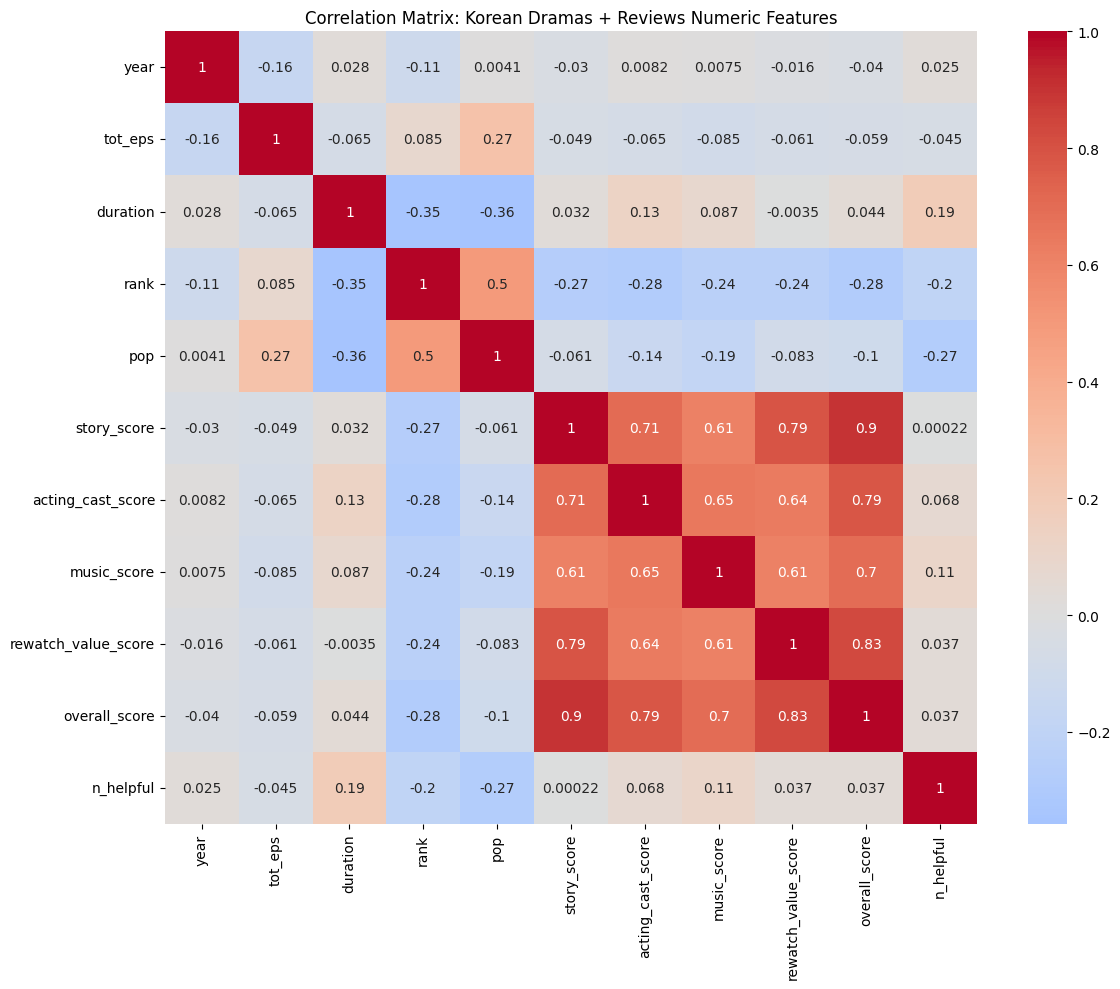

In [32]:
# Convert sentiment to numeric using one-hot encoding
sentiment_dummies = pd.get_dummies(df_kdramas_reviews['sentiment'], prefix='sentiment')

df_sentiment_numeric = pd.concat([df_kdramas_reviews[numeric_cols.drop(['Score'])]], axis=1)

# Calculate correlation matrix
corr_matrix = df_sentiment_numeric.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Korean Dramas + Reviews Numeric Features')
plt.tight_layout()
plt.show()

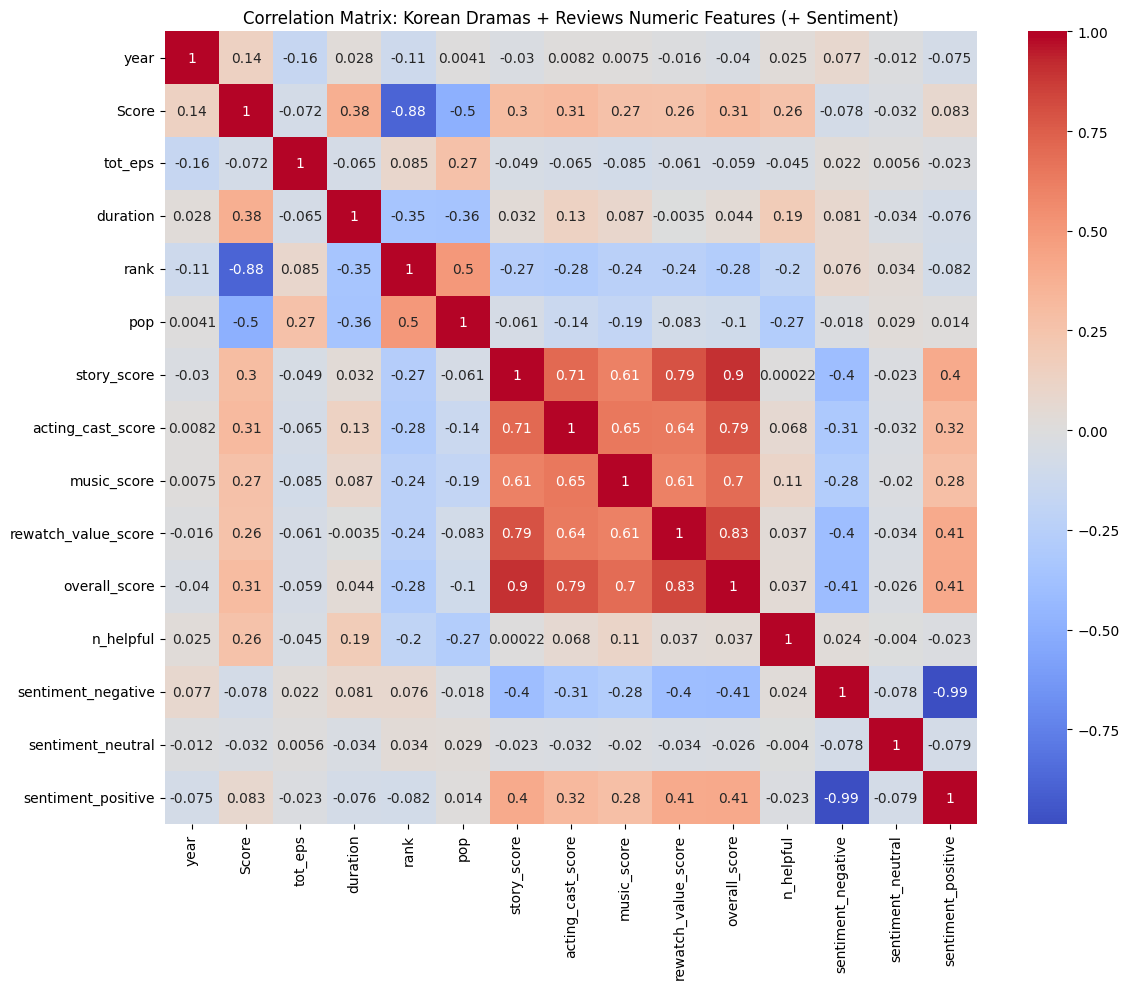

In [93]:
# Convert sentiment to numeric using one-hot encoding
sentiment_dummies = pd.get_dummies(df_kdramas_reviews['sentiment'], prefix='sentiment')

df_sentiment_numeric = pd.concat([df_kdramas_reviews[numeric_cols], sentiment_dummies], axis=1)

# Calculate correlation matrix
corr_matrix = df_sentiment_numeric.corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Korean Dramas + Reviews Numeric Features (+ Sentiment)')
plt.tight_layout()
plt.show()

Notable findings from this correlation matrix/heatmap above: 
- `overall_score` has very strong **positive correlations** with `story_score` (0.9), `rewatch_value_score` (0.83), `acting_cast_score` (0.79), and `music_score` (0.7)—which is to be expected, people who enjoy the story, acting, and music are more likely to enjoy the drama overall
- Regarding the ML-based sentiment analysis: 
    - Strong negative correlation (-0.99) between `sentiment_negative` and `sentiment_positive`, which is expected as they are opposing measures
    - Positive sentiment shows moderate positive correlations with `story_score` (0.4), `rewatch_value_score` (0.41), and `overall_score` (0.41)—suggesting that better-rated dramas tend to generate more positive sentiment in reviews. This also demonstrates that the sentiment analysis is working as intended; the text of the reviews is being analyzed correctly.
    - `sentiment_neutral` shows very weak correlations across the board, suggesting neutral reviews don't strongly relate to any other metrics
- `score` has a **negative correlation** with `rank` (-0.88), indicating higher-scored dramas get better rankings (lower rank numbers is better)
- `pop` has a **moderate positive correlation** with `rank` (0.5), suggesting that more popular dramas might not always have the best rankings  
- `duration` has **negative correlations** with `rank` (-0.40) and `pop` (-0.38)
- `year` exhibits very weak correlations with most variables, suggesting quality and sentiment metrics aren't strongly tied to when the drama was released

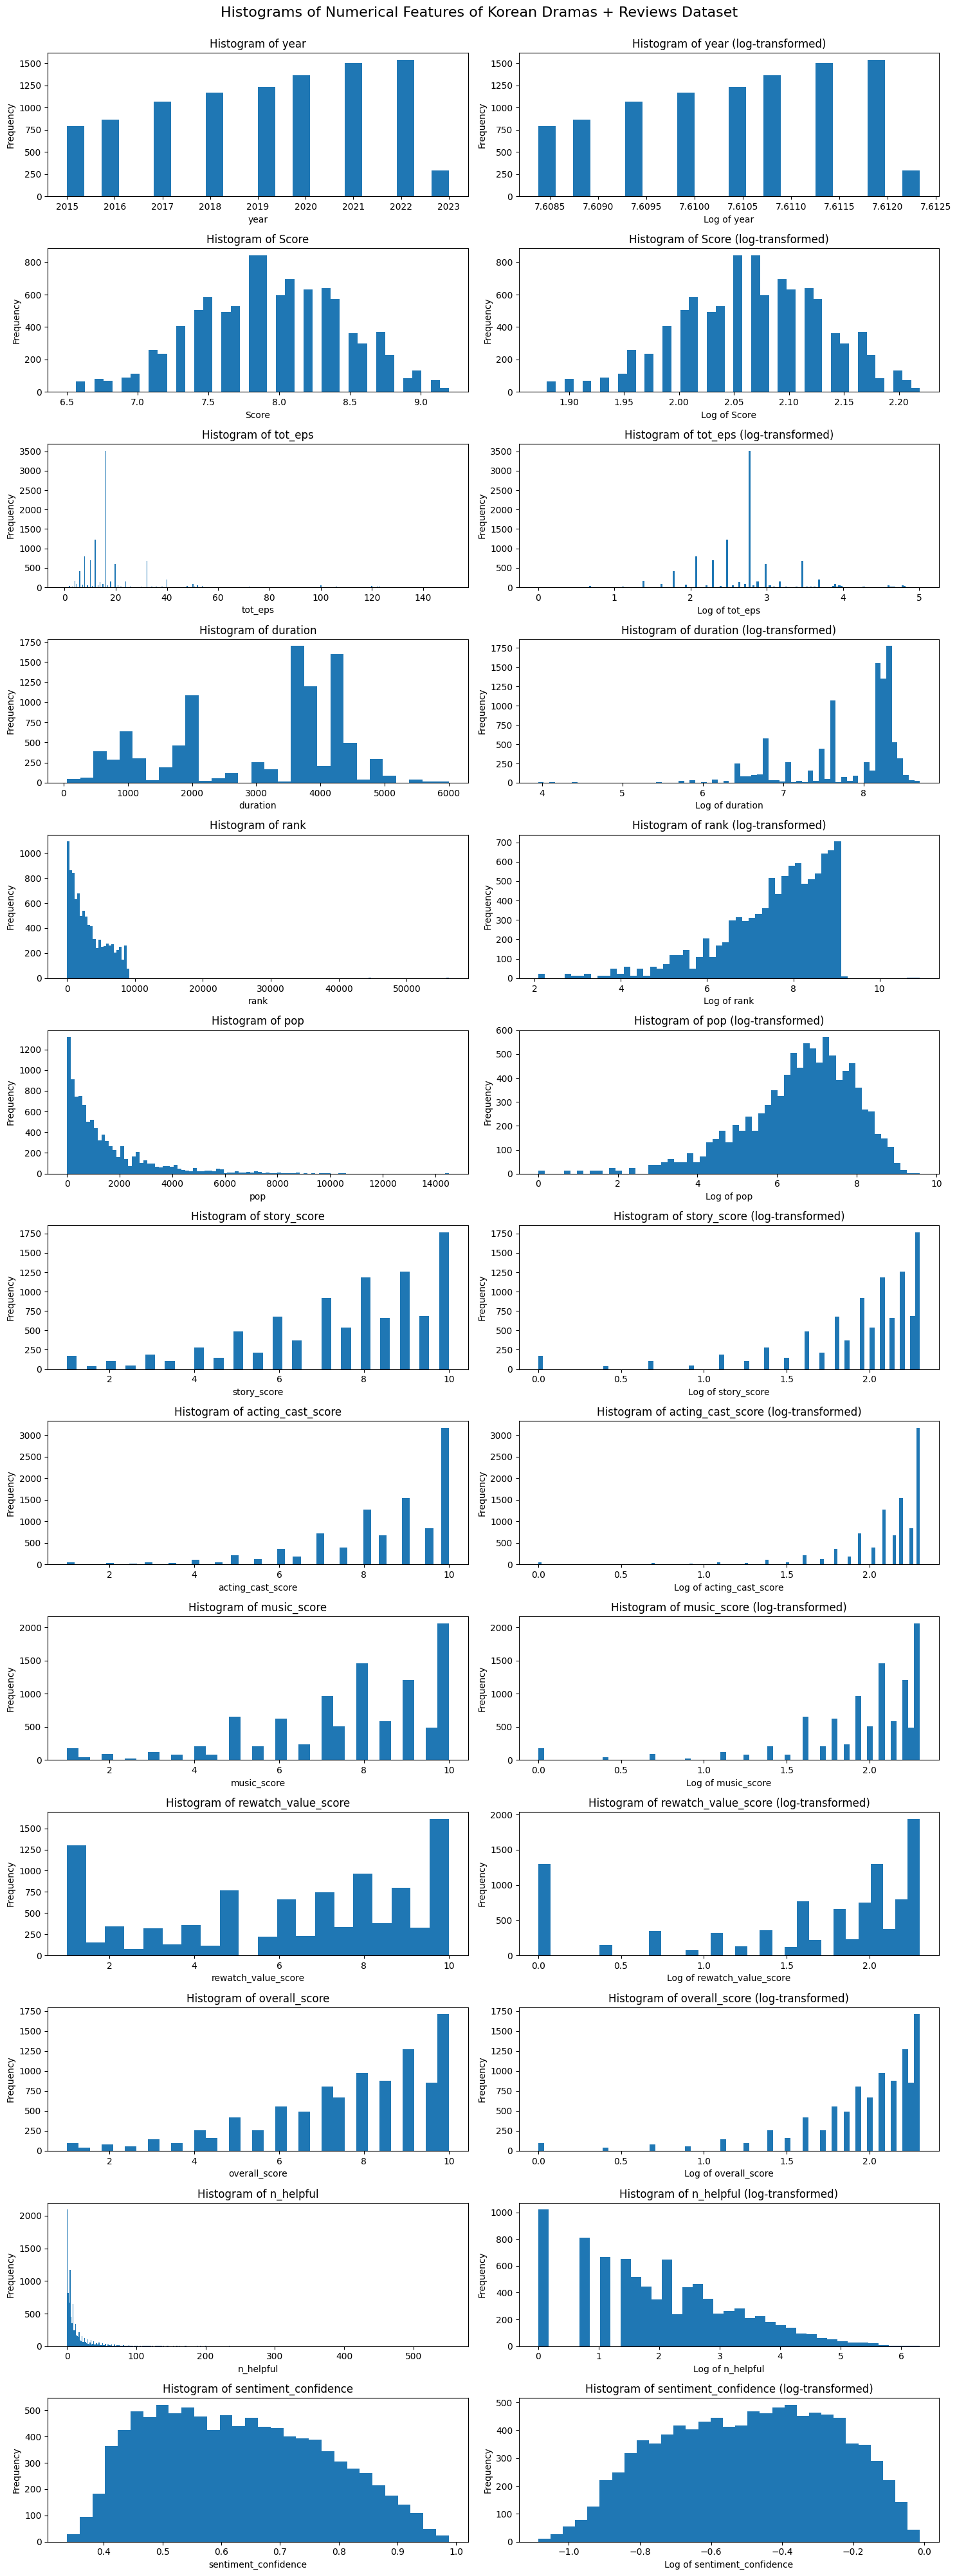

In [111]:
# Plotting histograms for each column separately + log transformed versions
numeric_cols = df_kdramas_reviews.select_dtypes(include=[np.number]).columns
fig, axs = plt.subplots(len(numeric_cols), 2, figsize=(15, 40))
for i, column in enumerate(numeric_cols):
    axs[i, 0].hist(df_kdramas_reviews[column], bins='auto')
    axs[i, 0].set_title(f'Histogram of {column}')
    axs[i, 0].set_xlabel(column)
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 1].hist(np.log(df_kdramas_reviews[column].where(df_kdramas_reviews[column] > 0)), bins='auto')
    axs[i, 1].set_title(f'Histogram of {column} (log-transformed)')
    axs[i, 1].set_xlabel(f'Log of {column}')
    axs[i, 1].set_ylabel('Frequency')
    
fig.suptitle('Histograms of Numerical Features of Korean Dramas + Reviews Dataset', fontsize=16, y=1)
fig.tight_layout()
plt.show() # Display the histogram

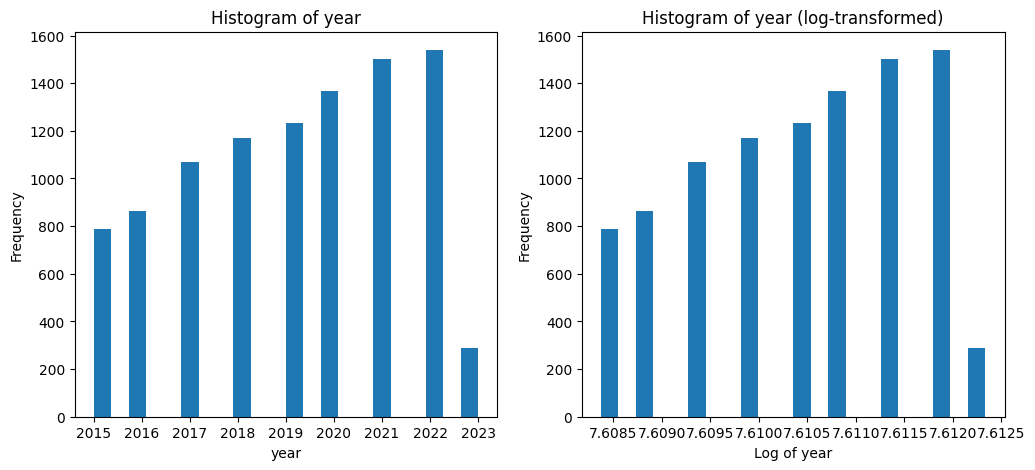

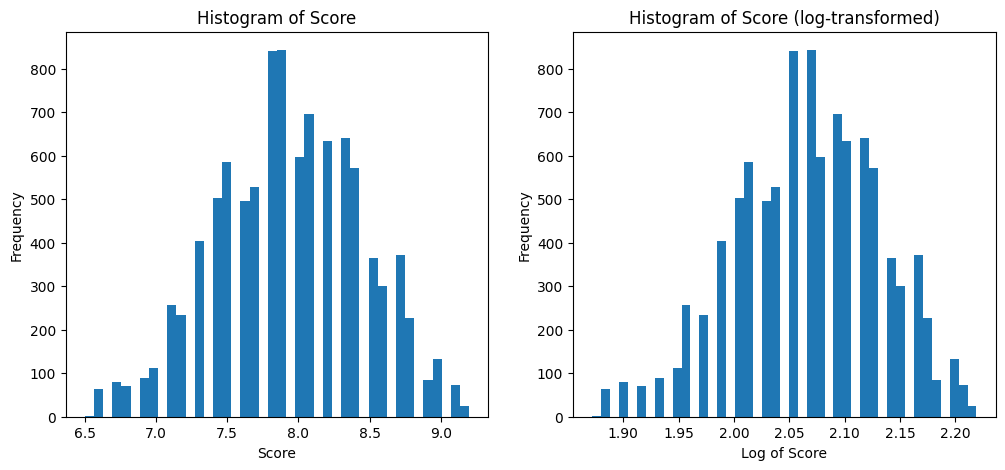

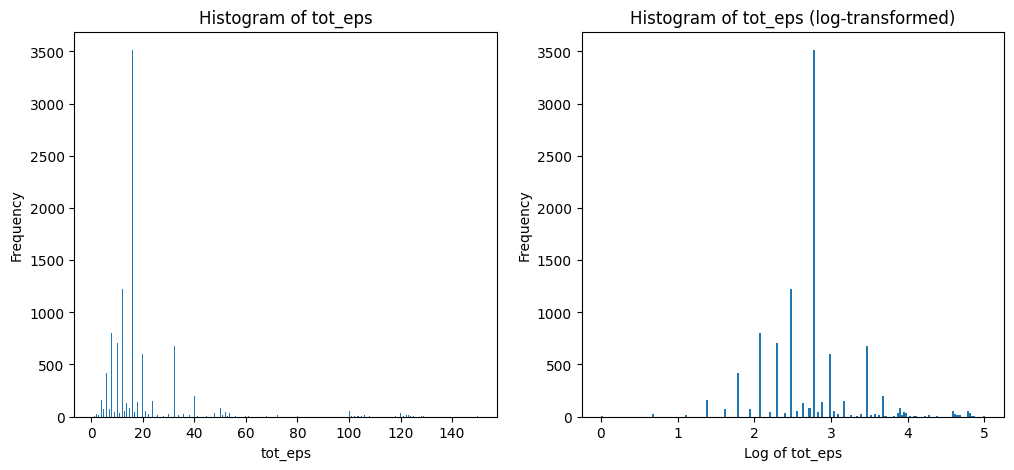

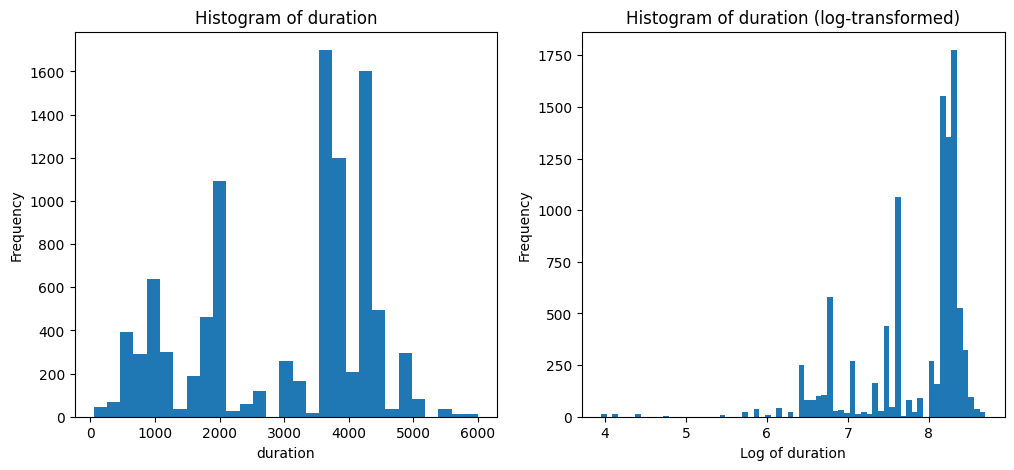

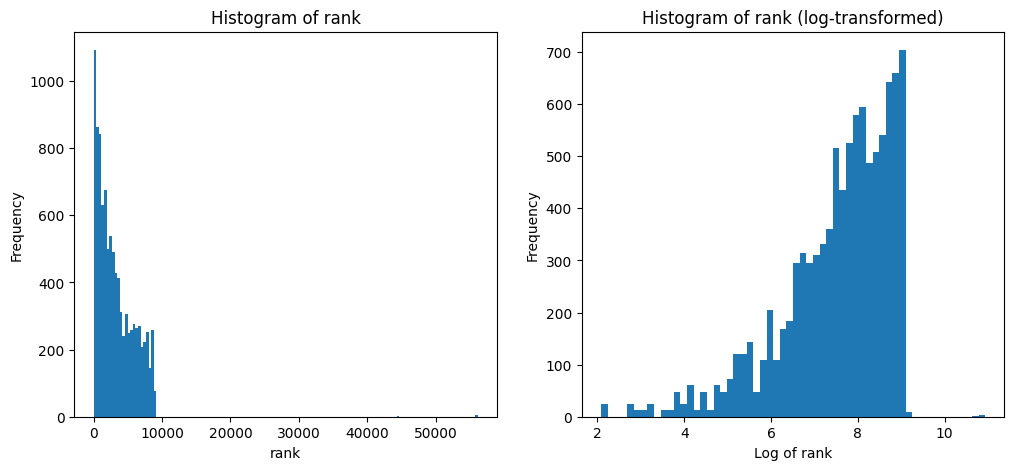

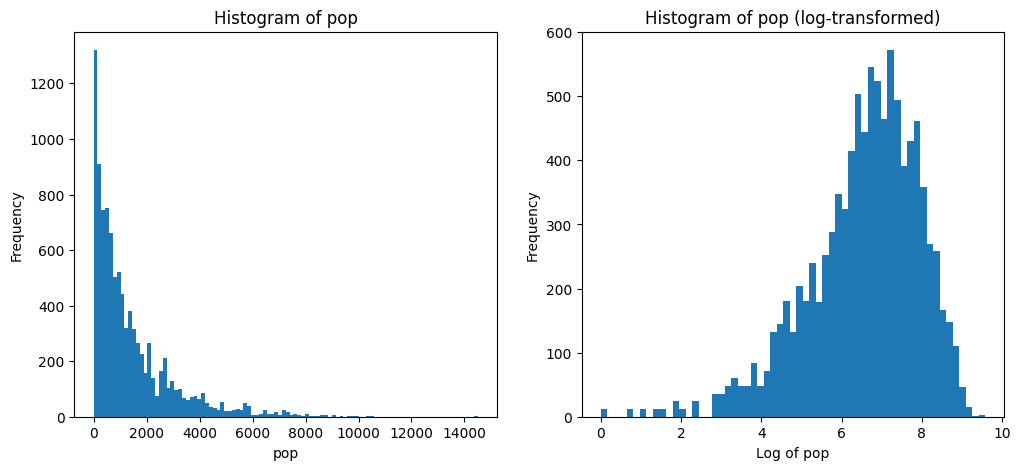

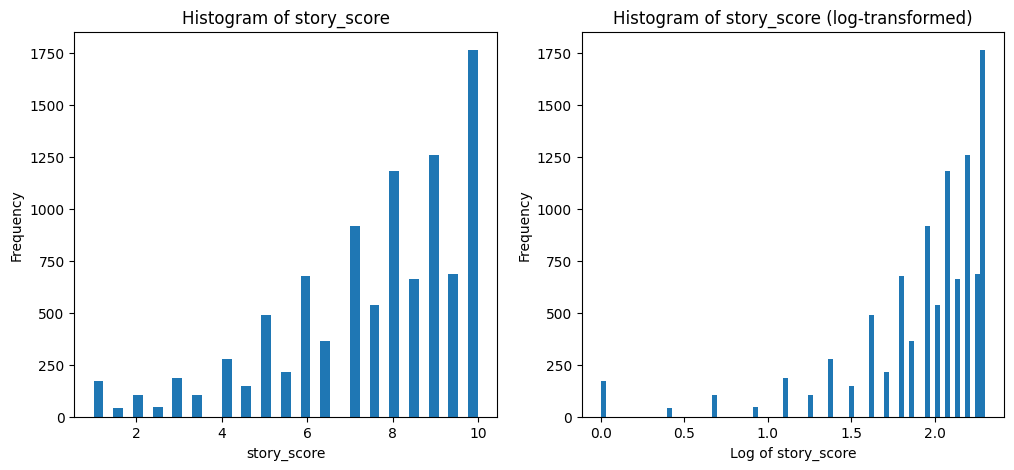

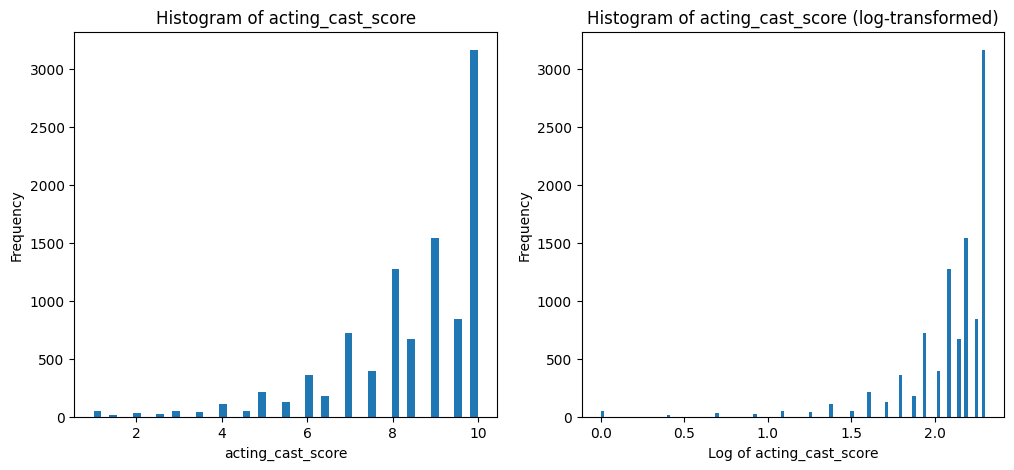

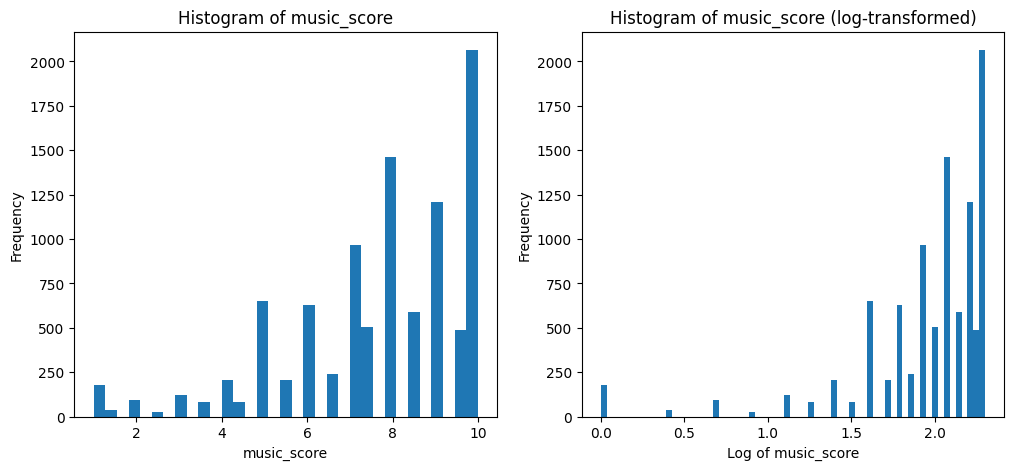

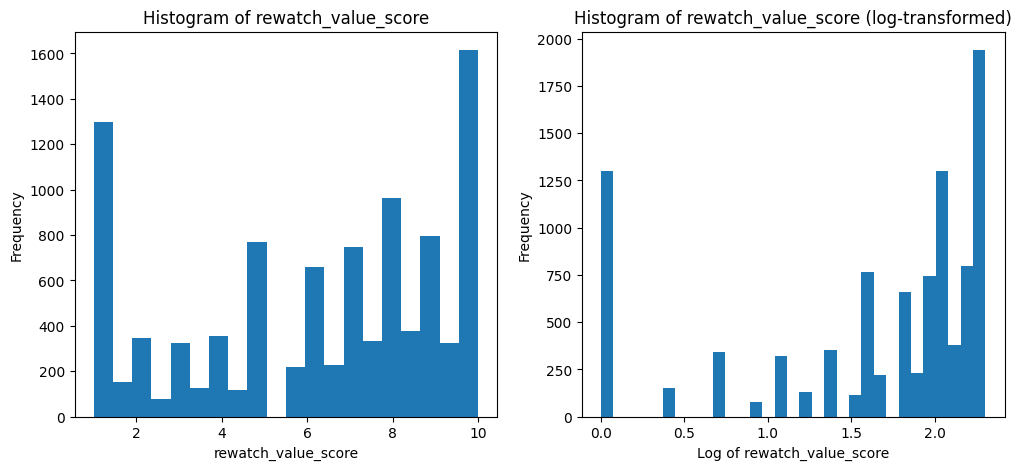

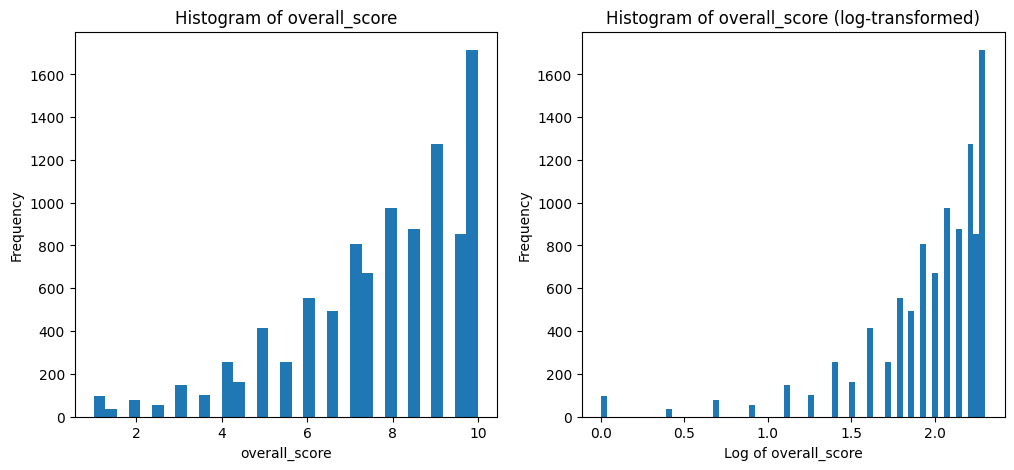

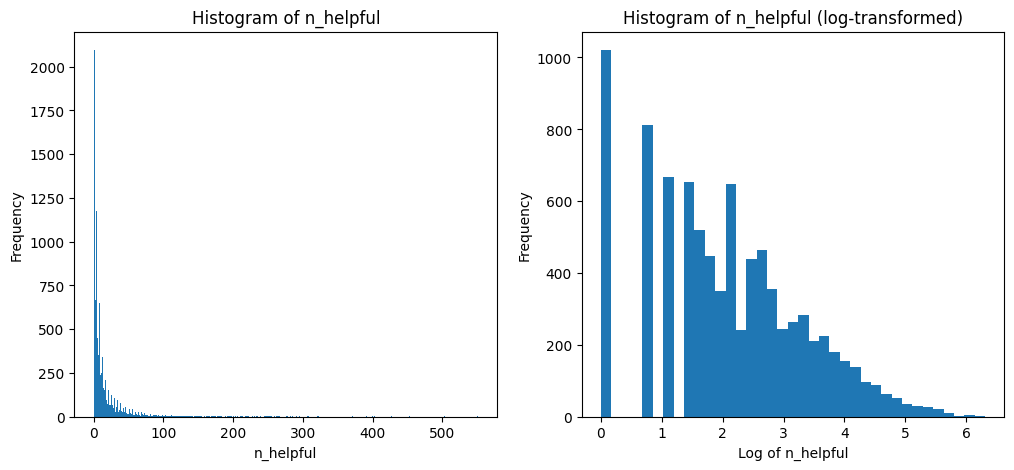

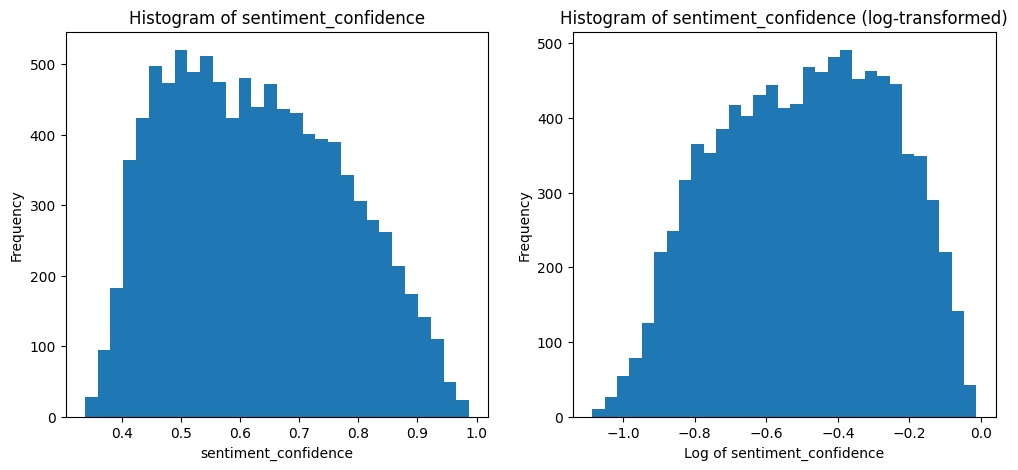

In [110]:
# Plotting histograms for each column separately + log transformed versions
numeric_cols = df_kdramas_reviews.select_dtypes(include=[np.number]).columns

for column in numeric_cols:
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].hist(df_kdramas_reviews[column], bins='auto')
    axs[0].set_title(f'Histogram of {column}')
    axs[0].set_xlabel(column)
    axs[0].set_ylabel('Frequency')
    axs[1].hist(np.log(df_kdramas_reviews[column].where(df_kdramas_reviews[column] > 0)), bins='auto')
    axs[1].set_title(f'Histogram of {column} (log-transformed)')
    axs[1].set_xlabel(f'Log of {column}')
    axs[1].set_ylabel('Frequency')
    plt.show() # Display the histogram

Interesting observations from the histograms above:
- With the exception of `score`, none of the histograms are normally distributed. The log transformations help normalize some distributions but not all. Interestingly enough `sentiment_confidence` is close, but this is likely due to the fact that it is a confidence score and is therefore more likely to be normally distributed; it does not give us any particular insight into the sentiment of the reviews.
- `pop` (popularity) remains heavily right-skewed, with most dramas having low popularity scores (<2000) and a few outliers reaching 12000+. As we saw in class, a log transformation makes the distribution more normal, suggesting a multiplicative effect in popularity growth
- `n_helpful` shows an extreme right skew, with most reviews getting few helpful votes and a rapid drop-off
- `tot_eps` shows distinct clustering around certain episode counts (16, 32, or 50 episode dramas across multiple seasons), reflecting common show format lengths 
    - `duration` also exhibits multiple distinct peaks, likely corresponding to standard episode lengths for different drama formats
- Most score related columns: `story_score`, `acting_cast_score`, `music_score`, `overall_score` are left-skewed, meaning that most dramas have a relatively high score, but a few dramas have a very low score (e.g. 1-2). As we saw in class, a log transformation does not make the distribution more normal but skews it more to the left. The only potential exception is `rewatch_value_score`, which is bi-modal with a slight left skew, suggesting that most dramas fall into two categories: those that are highly rewatchable (9-10) and likely one-time watches (1-2)

In [69]:
# Feature Selection
from sklearn.feature_selection import VarianceThreshold
# First, let’s check the variance of the numerical features.
num_features = df_kdramas_reviews.select_dtypes(include=[np.number]).columns
variance = df_kdramas_reviews[num_features].var()
print("Variance of numerical features:")
print(variance)

# We choose a threshold, a good rule of thumb is to set the threshold to 0.01.
vt = VarianceThreshold(threshold=0.01)
X_num = df_kdramas_reviews[num_features].fillna(0)  # temporarily fill missing values for variance calculation
vt.fit(X_num)
features_to_keep = X_num.columns[vt.get_support()]

print("\nNumerical features to keep (variance above threshold):")
print(list(features_to_keep))

Variance of numerical features:
year                   9.724602e+00
Score                  2.798882e-01
tot_eps                3.823722e+02
duration               2.000328e+06
rank                   1.891655e+08
pop                    2.824489e+08
story_score            4.932777e+00
acting_cast_score      3.061605e+00
music_score            4.785311e+00
rewatch_value_score    9.530520e+00
overall_score          4.446744e+00
n_helpful              1.013759e+03
dtype: float64

Numerical features to keep (variance above threshold):
['year', 'Score', 'tot_eps', 'duration', 'rank', 'pop', 'story_score', 'acting_cast_score', 'music_score', 'rewatch_value_score', 'overall_score', 'n_helpful']


In [115]:
df_reviews.columns

Index(['user_id', 'title', 'story_score', 'acting_cast_score', 'music_score',
       'rewatch_value_score', 'overall_score', 'review_text', 'ep_watched',
       'n_helpful'],
      dtype='object')

In [70]:
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_encoded = df_kdramas_reviews.copy()

# Numerical Data Transformations
num_cols = df_kdramas_reviews.select_dtypes(include=[np.number]).columns

# For Box-Cox transformation, the data must be positive.
for col in ['tot_eps', 'duration', 'rank', 'pop', 'music_score', 'story_score', 'acting_cast_score', 'rewatch_value_score', 'overall_score', 'n_helpful']:
    if col in df_encoded.columns:
        # Check for non-positive values and shift if necessary
        min_val = df_encoded[col].min()
        if min_val <= 0:
            df_encoded[col] = df_encoded[col] + abs(min_val) + 1
        transformed, lam = boxcox(df_encoded[col].fillna(1e-8))
        df_encoded[col + '_boxcox'] = transformed
        print(f"Applied Box-Cox transformation on {col} (lambda: {lam:.4f}).")
        # Optionally, drop or retain the original column

# Standardize numerical features
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

# Normalize (MinMax scaling)
minmax = MinMaxScaler()
df_encoded[num_cols] = minmax.fit_transform(df_encoded[num_cols])

# Categorical Data Transformations
cat_cols = df_encoded.select_dtypes(include=["object"]).columns
print("\nCategorical columns before encoding:", list(cat_cols))

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_kdramas_reviews, columns=cat_cols, drop_first=True)

print("\nShape after one-hot encoding:", df_encoded.shape)
display(df_encoded)

Applied Box-Cox transformation on tot_eps (lambda: -0.1615).
Applied Box-Cox transformation on duration (lambda: 0.3796).
Applied Box-Cox transformation on rank (lambda: 0.1987).
Applied Box-Cox transformation on pop (lambda: 0.1654).
Applied Box-Cox transformation on music_score (lambda: 0.4210).
Applied Box-Cox transformation on story_score (lambda: 0.4184).
Applied Box-Cox transformation on acting_cast_score (lambda: 0.4547).
Applied Box-Cox transformation on rewatch_value_score (lambda: 0.3381).
Applied Box-Cox transformation on overall_score (lambda: 0.4275).
Applied Box-Cox transformation on n_helpful (lambda: 0.2106).

Categorical columns before encoding: ['title', 'Genre', 'Tags', 'Watchers', 'Main Cast', 'img url', 'kdrama_id', 'director', 'screenwriter', 'country', 'type', 'start_dt', 'end_dt', 'aired_on', 'org_net', 'content_rt', 'synopsis', 'user_id', 'review_text', 'ep_watched']

Shape after one-hot encoding: (11776, 31635)


,year,Score,tot_eps,duration,rank,pop,story_score,acting_cast_score,music_score,rewatch_value_score,...,ep_watched_9 of 10 episodes seen,ep_watched_9 of 11 episodes seen,ep_watched_9 of 12 episodes seen,ep_watched_9 of 120 episodes seen,ep_watched_9 of 14 episodes seen,ep_watched_9 of 16 episodes seen,ep_watched_9 of 32 episodes seen,ep_watched_9 of 9 episodes seen,ep_watched_92 of 120 episodes seen,ep_watched_99 of 99 episodes seen
0,2003.0,7.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2018.0,8.3,16.0,4500.0,882.0,140.0,7.0,8.0,8.0,5.0,...,False,False,False,False,False,False,False,False,False,False
2,2018.0,8.3,16.0,4500.0,882.0,140.0,8.0,10.0,8.0,8.0,...,False,False,False,False,False,False,False,False,False,False
3,2018.0,8.3,16.0,4500.0,882.0,140.0,8.0,9.5,8.0,7.5,...,False,False,False,False,False,False,False,False,False,False
4,2018.0,8.3,16.0,4500.0,882.0,140.0,6.0,7.0,7.0,5.5,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11771,2020.0,8.2,24.0,1800.0,1312.0,597.0,1.0,7.0,7.0,1.0,...,False,False,False,False,False,False,False,False,False,False
11772,2020.0,8.2,24.0,1800.0,1312.0,597.0,9.0,9.0,10.0,8.0,...,False,False,False,False,False,False,False,False,False,False
11773,2020.0,8.2,24.0,1800.0,1312.0,597.0,8.0,8.0,5.5,7.5,...,False,False,False,False,False,False,False,False,False,False
11774,2020.0,8.2,24.0,1800.0,1312.0,597.0,8.0,8.0,9.0,7.0,...,False,False,False,False,False,False,False,False,False,False


In [71]:
# # First of all, let's check for empty values in the dataset and see how we should handle them
# df_kdramas_reviews.isna().sum()

# # Visualize missing values
# plt.figure(figsize=(12, 8))
# sns.heatmap(df_kdramas_reviews.isna(), cbar=False, cmap='viridis')
# plt.title('Missing Values Heatmap')
# plt.show()